In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     132 non-null    object 
 1   country_name     132 non-null    object 
 2   admin_level      132 non-null    object 
 3   metric           132 non-null    object 
 4   units            132 non-null    object 
 5   year             132 non-null    int64  
 6   cases_value      132 non-null    float64
 7   migration_value  132 non-null    int64  
 8   TAVG             132 non-null    float64
 9   TMAX             132 non-null    float64
 10  TMIN             132 non-null    float64
 11  PRCP             132 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 12.5+ KB
None
              year  cases_value  migration_value        TAVG        TMAX  \
count   132.000000   132.000000       132.000000  132.000000  132.000000   
mean   2010.500000     0.689414

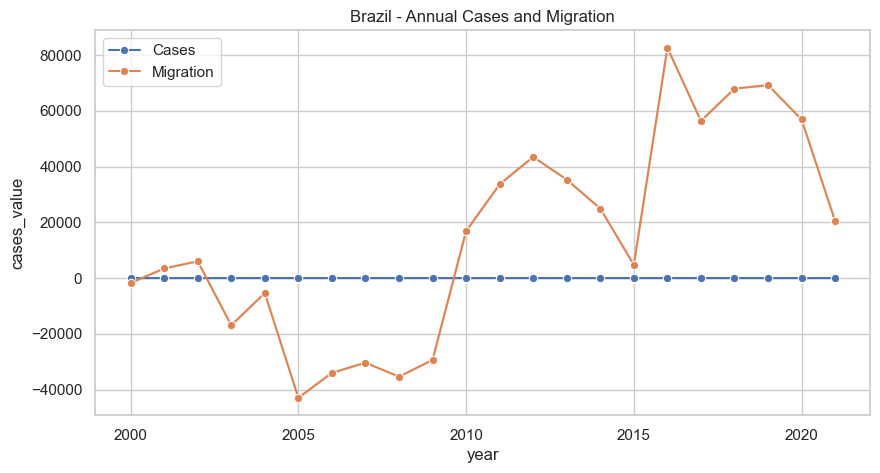

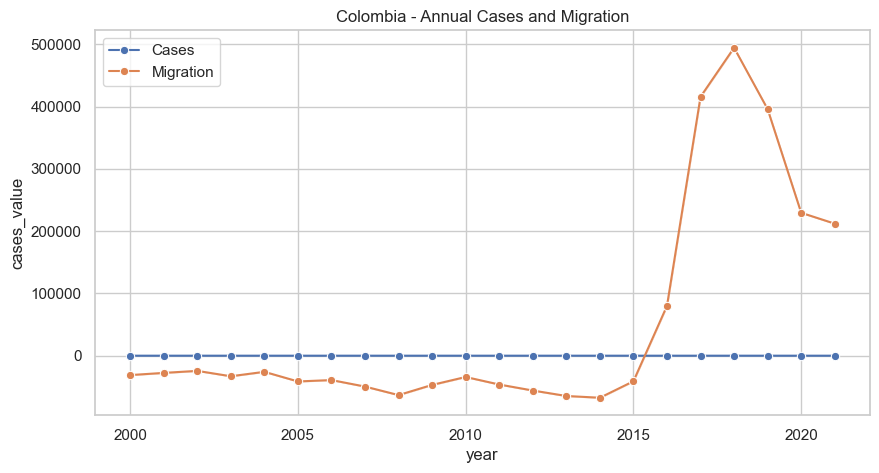

                 cases_value  migration_value
cases_value         1.000000        -0.081783
migration_value    -0.081783         1.000000


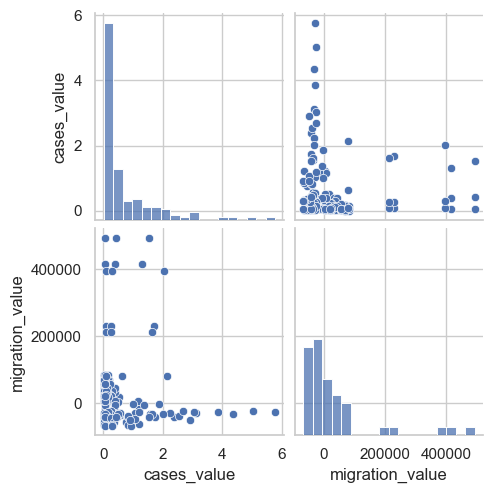

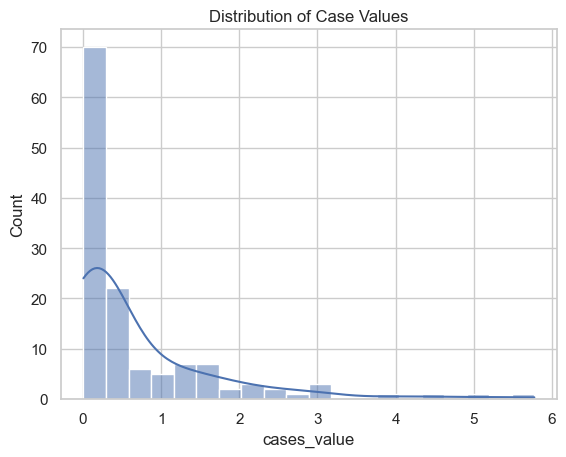

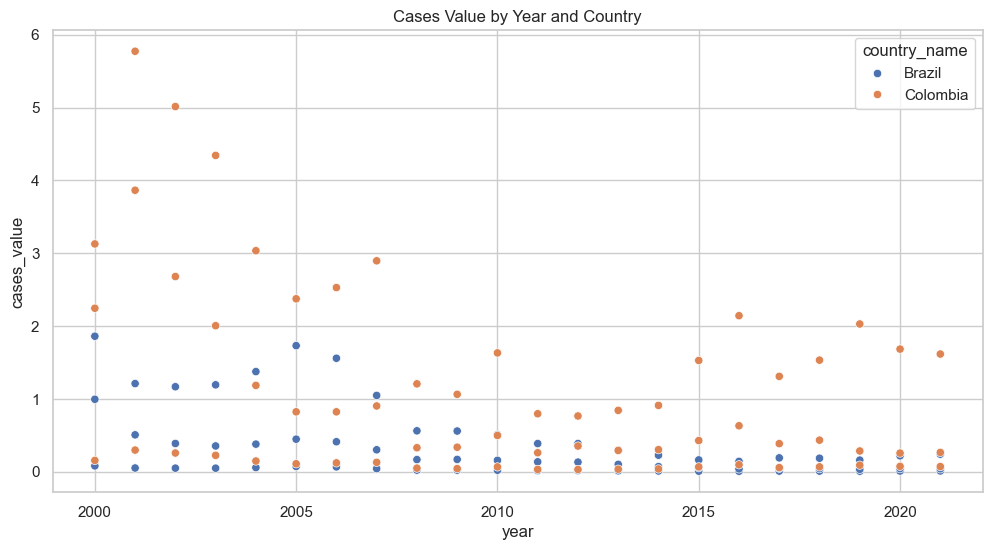

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your merged data
df = pd.read_csv('final_merged_dataset.csv')
import pandas as pd

# Convert cases_value from per thousand to absolute count (in thousands)
# If metric is incidence or mortality rate per thousand, convert to thousands by multiplying by 1000



# Basic info
print(df.info())
print(df.describe())  # Basic statistics for numeric columns

# Check for missing values
print(df.isna().sum())

# Unique categories and target summary
print(df['country_code'].unique())
print(df['metric'].value_counts())
print(df['units'].value_counts())

# Plot cases_value and migration_value over time for each country
sns.set(style="whitegrid")
for country in df['country_name'].unique():
    sub = df[df['country_name'] == country]
    plt.figure(figsize=(10,5))
    ax1 = sns.lineplot(x='year', y='cases_value', data=sub, label='Cases', marker='o')
    ax2 = sns.lineplot(x='year', y='migration_value', data=sub, label='Migration', marker='o')
    plt.title(f"{country} - Annual Cases and Migration")
    plt.legend()
    plt.show()

# Correlation
print(df[['cases_value','migration_value']].corr())

# Pairplot for cases/migration (optional, but for multi-country usually subset/aggregate)
sns.pairplot(df[['cases_value', 'migration_value']])
plt.show()

# Distribution of target (cases_value)
sns.histplot(df['cases_value'], bins=20, kde=True)
plt.title("Distribution of Case Values")
plt.show()

# Scatter by year, colored by country
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='year', y='cases_value', hue='country_name')
plt.title("Cases Value by Year and Country")
plt.show()
